<a href="https://colab.research.google.com/github/m-and-ms/Question-Clustering-/blob/master/TF_IDF_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from gensim.models import Word2Vec
import numpy as np


In [0]:
import pandas as pd

In [0]:
Q_df=pd.read_json (r'WebQSP.train.json')


In [0]:
Q_df

,Version,FreebaseVersion,Questions
0,1,2015-08-09,"{'QuestionId': 'WebQTrn-0', 'RawQuestion': 'wh..."
1,1,2015-08-09,"{'QuestionId': 'WebQTrn-1', 'RawQuestion': 'wh..."
2,1,2015-08-09,"{'QuestionId': 'WebQTrn-3', 'RawQuestion': 'wh..."
3,1,2015-08-09,"{'QuestionId': 'WebQTrn-4', 'RawQuestion': 'wh..."
4,1,2015-08-09,"{'QuestionId': 'WebQTrn-5', 'RawQuestion': 'wh..."
...,...,...,...
3093,1,2015-08-09,"{'QuestionId': 'WebQTrn-3771', 'RawQuestion': ..."
3094,1,2015-08-09,"{'QuestionId': 'WebQTrn-3772', 'RawQuestion': ..."
3095,1,2015-08-09,"{'QuestionId': 'WebQTrn-3773', 'RawQuestion': ..."
3096,1,2015-08-09,"{'QuestionId': 'WebQTrn-3775', 'RawQuestion': ..."


In [0]:
Q_df.columns

Index(['Version', 'FreebaseVersion', 'Questions'], dtype='object')

In [0]:
Q_df['Questions'][1]['ProcessedQuestion']

'what character did natalie portman play in star wars'

In [0]:
num_questions=len(Q_df['Questions'])

In [0]:
Sentences_Data=[Q_df['Questions'][idx]['ProcessedQuestion'] for idx in range(num_questions) ]

In [0]:
len(Sentences_Data)

3098

In [0]:
Sentences_Data

['what is the name of justin bieber brother',
 'what character did natalie portman play in star wars',
 'what country is the grand bahama island in',
 'what kind of money to take to bahamas',
 'what character did john noble play in lord of the rings',
 'who does joakim noah play for',
 'where are the nfl redskins from',
 'where did saki live',
 'how old is sacha baron cohen',
 'what time zone am i in cleveland ohio',
 'who did draco malloy end up marrying',
 'which countries border the us',
 'where is rome italy located on a map',
 'what is nina dobrev nationality',
 'which kennedy died first',
 'what books did beverly cleary right',
 'where to fly into bali',
 'who is the prime minister of ethiopia',
 'what to see near sedona arizona',
 'what high school did president bill clinton attend',
 'what form of government does russia have today',
 'what movies does taylor lautner play in',
 'what year lebron james came to the nba',
 'which wife did king henry behead',
 "who was ishmael 's mo

In [0]:
import re , nltk, pprint

In [0]:

from nltk import *
from nltk.corpus import stopwords 
stemmer = nltk.stem.porter.PorterStemmer()

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stop_words = set(stopwords.words('english')) 


In [0]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
def clean_text(sent_list):
  cleanr = re.compile('<.*?>|&([0-9]+|#[0-9]{1,6}|#x[0-]{1,6});')
  #token_sents = [print(tk)  for sent in token_sents for tk in sent ]

  token_sents = [re.sub(cleanr, '', sent)  for sent in sent_list ]
  token_sents=[re.sub("'","",sent) for sent in token_sents  ]

  token_sents=[sent.strip("'") for sent in token_sents  ]
  token_sents=[sent.lower() for sent in token_sents  ]

  token_sents =[ word_tokenize(sent)  for sent in token_sents ]  
  #token_sents = [w for word_tokens in token_sents for w in word_tokens  if not w in stop_words]  
  token_sents = [w for word_tokens in token_sents for w in word_tokens if not w in stop_words] 

  

  return token_sents


In [0]:
data_tokens=clean_text(Sentences_Data)

In [0]:
data_tokens

['name',
 'justin',
 'bieber',
 'brother',
 'character',
 'natalie',
 'portman',
 'play',
 'star',
 'wars',
 'country',
 'grand',
 'bahama',
 'island',
 'kind',
 'money',
 'take',
 'bahamas',
 'character',
 'john',
 'noble',
 'play',
 'lord',
 'rings',
 'joakim',
 'noah',
 'play',
 'nfl',
 'redskins',
 'saki',
 'live',
 'old',
 'sacha',
 'baron',
 'cohen',
 'time',
 'zone',
 'cleveland',
 'ohio',
 'draco',
 'malloy',
 'end',
 'marrying',
 'countries',
 'border',
 'us',
 'rome',
 'italy',
 'located',
 'map',
 'nina',
 'dobrev',
 'nationality',
 'kennedy',
 'died',
 'first',
 'books',
 'beverly',
 'cleary',
 'right',
 'fly',
 'bali',
 'prime',
 'minister',
 'ethiopia',
 'see',
 'near',
 'sedona',
 'arizona',
 'high',
 'school',
 'president',
 'bill',
 'clinton',
 'attend',
 'form',
 'government',
 'russia',
 'today',
 'movies',
 'taylor',
 'lautner',
 'play',
 'year',
 'lebron',
 'james',
 'came',
 'nba',
 'wife',
 'king',
 'henry',
 'behead',
 'ishmael',
 'mom',
 'malcolm',
 'x',
 'tryi

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer


In [0]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data_tokens)

In [0]:
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(X_train_counts)

In [0]:
tfidf_matrix.shape

(10990, 2911)

In [0]:
word2tfidf = dict(zip(count_vect.get_feature_names(), tfidf_transformer.idf_,))

In [0]:
from sklearn.cluster import AgglomerativeClustering


In [0]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')


In [0]:
cluster.fit(tfidf_matrix.toarray())

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [0]:
labels = cluster.labels_



In [0]:
print(labels)

[0 0 0 ... 0 0 0]


In [0]:
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [0]:
model = TSNE(n_components=2, random_state=1,metric='euclidean', n_iter=15000)


In [0]:
Y=model.fit_transform(tfidf_matrix)


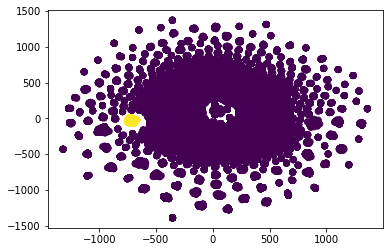

In [0]:
plt.scatter(Y[:, 0], Y[:, 1], c=labels)

In [0]:
for j in range(len(Sentences_Data)):    
   print ("%s %s" % (labels[j],  Sentences_Data[j]))

0 what is the name of justin bieber brother
0 what character did natalie portman play in star wars
0 what country is the grand bahama island in
0 what kind of money to take to bahamas
0 what character did john noble play in lord of the rings
0 who does joakim noah play for
0 where are the nfl redskins from
1 where did saki live
0 how old is sacha baron cohen
0 what time zone am i in cleveland ohio
0 who did draco malloy end up marrying
0 which countries border the us
0 where is rome italy located on a map
0 what is nina dobrev nationality
0 which kennedy died first
0 what books did beverly cleary right
0 where to fly into bali
0 who is the prime minister of ethiopia
0 what to see near sedona arizona
0 what high school did president bill clinton attend
0 what form of government does russia have today
1 what movies does taylor lautner play in
0 what year lebron james came to the nba
0 which wife did king henry behead
0 who was ishmael 's mom
0 what was malcolm x trying to accomplish
1 wh

In [0]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 

In [0]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(tfidf_matrix)
print(kmeans.labels_)
km_tf=kmeans.fit_transform(tfidf_matrix)

[1 1 1 ... 1 1 1]


In [0]:
type1_occurrences = np.count_nonzero(kmeans.labels_ == 1)

NameError: ignored

In [0]:
type2_occurences=np.count_nonzero(kmeans.labels_ == 0)

In [0]:
total_occurances=len(kmeans.labels_)

In [0]:
print("Type1 percentage",(type1_occurrences/total_occurances)*100 ,"Type2 percentage ",(type2_occurences/total_occurances)*100 )

In [0]:
print("Type1 count",(type1_occurrences) ,"Type2 count ",(type2_occurences))

In [0]:
plt.scatter(km_tf[:,0],km_tf[:,1],c=kmeans.labels_,marker='X')

In [0]:
y_means=kmeans.predict(tfidf_matrix)

In [0]:
kmeans.cluster_centers_.shape


In [0]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2).fit(tfidf_matrix.toarray())
colors=['red','green','blue','yellow','black'] 
label_colors=[colors[i] for i in kmeans.labels_]
coords=pca.transform(tfidf_matrix.toarray())

plt.scatter(coords[:,0],coords[:,1],c=label_colors)

centroids=kmeans.cluster_centers_
centroidcoords=pca.transform(centroids)
plt.scatter(centroidcoords[:,0],centroidcoords[:,1],marker='X')
plt.show()

In [0]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(tfidf_matrix.toarray()) 
    kmeanModel.fit(tfidf_matrix.toarray())     
      
    distortions.append(sum(np.min(cdist(tfidf_matrix.toarray(), kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / np.asarray(tfidf_matrix.toarray()).shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(tfidf_matrix.toarray(), kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / np.asarray( tfidf_matrix.toarray()).shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 